# Project 7 -- Colleen Malloy

**TA Help:** 
    
**Collaboration:** 

## Question 1

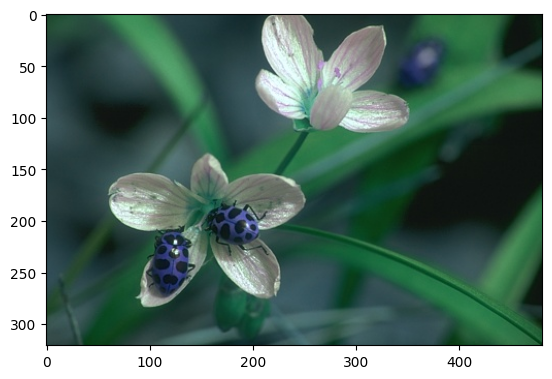

In [18]:
#1a
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('/anvil/projects/tdm/data/segmentation_images/35008.jpg') # we can use the imread function to read an image from a file

plt.imshow(img) # we can use matplotlib to display the image

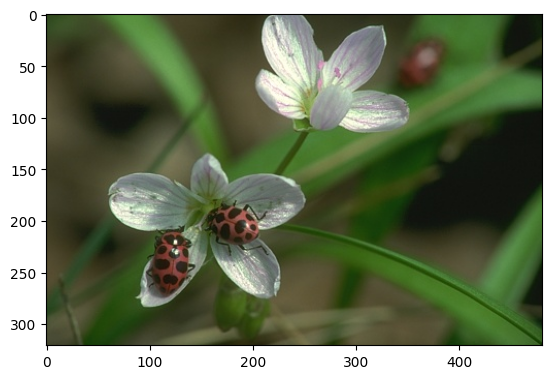

In [19]:
#1b
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('/anvil/projects/tdm/data/segmentation_images/35008.jpg') # we can use the imread function to read an image from a file
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # we can use the cvtColor function to convert the image to RGB format
plt.imshow(img_rgb) # we can use matplotlib to display the image


Markdown notes and sentences and analysis written here.

## Question 2

In [24]:
image_reformatted = img_rgb.reshape((-1, 3)) # we can use the reshape function to convert the image to a 2D array. The (-1, 3) means that we want to keep the number of color channels (3) and flatten the other dimensions into a single dimension.

In [25]:
image_reformatted = image_reformatted.astype(np.float32) # we can use the astype function to convert the data to 32-bit float format

In [26]:
K = 5 # the number of clusters we want to create

criteria_type = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER # the type of criteria we want to use
criteria_max_iter = 10 # the maximum number of iterations the algorithm should run for
criteria_epsilon = 1.0 # the accuracy we want to achieve
criteria = (criteria_type, criteria_max_iter, criteria_epsilon) # we can create a tuple with the criteria parameters

bestLabels = None # we can leave this as None, as we don't need to use it for now

attempts = 10 # the number of times the algorithm should be run with different initializations

flags = cv2.KMEANS_RANDOM_CENTERS # the flags for the algorithm. KMEANS_RANDOM_CENTERS initializes the cluster centers randomly, while KMEANS_PP_CENTERS initializes the cluster centers using the K-means++ algorithm

In [27]:
compactness, labels, centers = cv2.kmeans(image_reformatted, K, bestLabels, criteria, attempts, flags) # we can use the kmeans function to run the algorithm

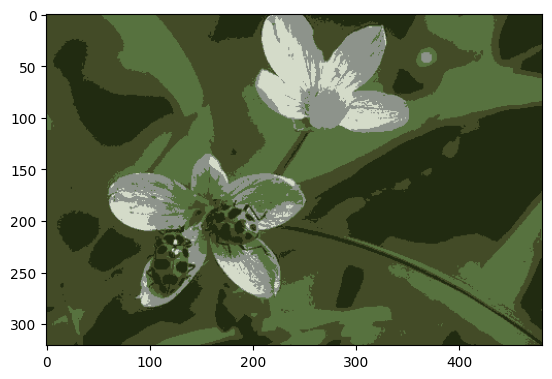

In [28]:
#2a
segmented_image = centers[labels.flatten()] # we can use the labels to index into the centers to get the segmented image

segmented_image = segmented_image.reshape(img_rgb.shape) # we can reshape the segmented image back to the original image shape

plt.imshow(segmented_image.astype(np.uint8)) # we can display the segmented image using matplotlib

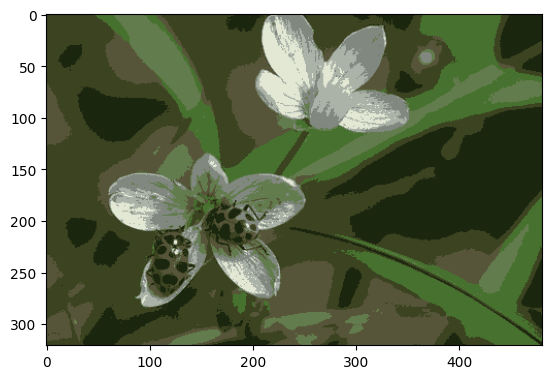

In [12]:
K = 8 # the number of clusters we want to create

criteria_type = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER # the type of criteria we want to use
criteria_max_iter = 10 # the maximum number of iterations the algorithm should run for
criteria_epsilon = 1.0 # the accuracy we want to achieve
criteria = (criteria_type, criteria_max_iter, criteria_epsilon) # we can create a tuple with the criteria parameters

bestLabels = None # we can leave this as None, as we don't need to use it for now

attempts = 10 # the number of times the algorithm should be run with different initializations

flags = cv2.KMEANS_RANDOM_CENTERS # the flags for the algorithm. KMEANS_RANDOM_CENTERS initializes the cluster centers randomly, while KMEANS_PP_CENTERS initializes the cluster centers using the K-means++ algorithm

compactness, labels, centers = cv2.kmeans(image_reformatted, K, bestLabels, criteria, attempts, flags) # we can use the kmeans function to run the algorithm

#2b
segmented_image = centers[labels.flatten()] # we can use the labels to index into the centers to get the segmented image

segmented_image = segmented_image.reshape(img_rgb.shape) # we can reshape the segmented image back to the original image shape

plt.imshow(segmented_image.astype(np.uint8)) # we can display the segmented image using matplotlib

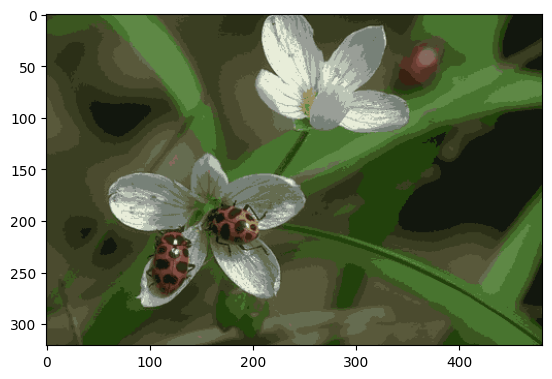

In [15]:
K = 20 # the number of clusters we want to create

criteria_type = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER # the type of criteria we want to use
criteria_max_iter = 12 # the maximum number of iterations the algorithm should run for
criteria_epsilon = 1.0 # the accuracy we want to achieve
criteria = (criteria_type, criteria_max_iter, criteria_epsilon) # we can create a tuple with the criteria parameters

bestLabels = None # we can leave this as None, as we don't need to use it for now

attempts = 10 # the number of times the algorithm should be run with different initializations

flags = cv2.KMEANS_RANDOM_CENTERS # the flags for the algorithm. KMEANS_RANDOM_CENTERS initializes the cluster centers randomly, while KMEANS_PP_CENTERS initializes the cluster centers using the K-means++ algorithm

compactness, labels, centers = cv2.kmeans(image_reformatted, K, bestLabels, criteria, attempts, flags) # we can use the kmeans function to run the algorithm

#2b
segmented_image = centers[labels.flatten()] # we can use the labels to index into the centers to get the segmented image

segmented_image = segmented_image.reshape(img_rgb.shape) # we can reshape the segmented image back to the original image shape

plt.imshow(segmented_image.astype(np.uint8)) # we can display the segmented image using matplotlib

Increasing these values allows for more precise coloring and the image looks more like the clear image. It gets clearer and sharper the more I increase the K value and criteria parameters.

## Question 3

In [29]:
def kmeans_segment_image(image, K):
    # STEP 1: Preprocess the image, reshaping it and converting it to float32

    # STEP 2: Define the K-means parameters (criteria, bestLabels, attempts, flags)

    # STEP 3: Run the K-means algorithm using cv2.kmeans

    # STEP 4: Return the compactness, labels, and centers

    return compactness, labels, centers

Compactness for K=5: 97378250.93174788


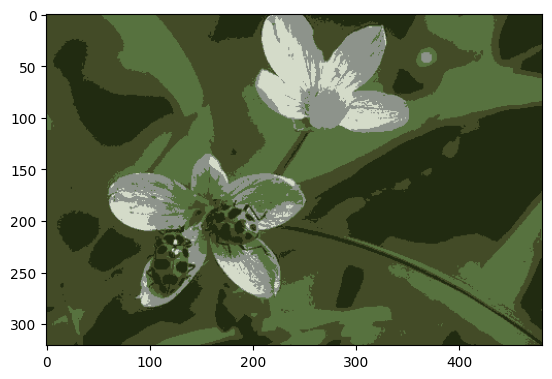

In [30]:
compactness, labels, centers = kmeans_segment_image(img_rgb, 5)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_rgb.shape)
plt.imshow(segmented_image.astype(np.uint8))
print(f"Compactness for K=5: {compactness}")

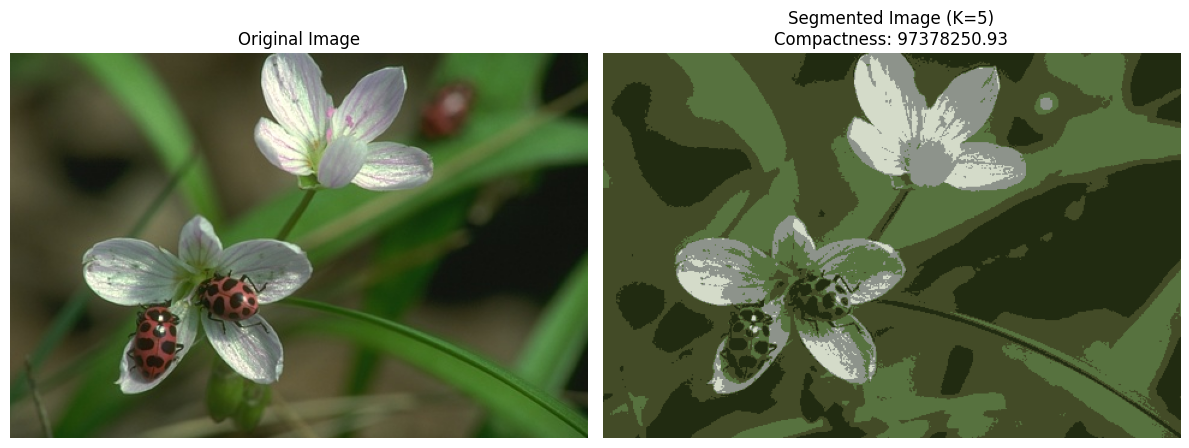

Compactness for K=5: 97378250.93


In [31]:
# 3b. Image displayed using matplotlib for K=5 using the function
import matplotlib.pyplot as plt
compactness, labels, centers = kmeans_segment_image(img_rgb, 5)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_rgb.shape)

plt.figure(figsize=(12, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Display segmented image for K=5
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'Segmented Image (K=5)\nCompactness: {compactness:.2f}')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Compactness for K=5: {compactness:.2f}")

Generating elbow method plot...
K=1: Compactness = 97378250.93
K=2: Compactness = 97378250.93
K=3: Compactness = 97378250.93
K=4: Compactness = 97378250.93
K=5: Compactness = 97378250.93
K=6: Compactness = 97378250.93
K=7: Compactness = 97378250.93
K=8: Compactness = 97378250.93
K=9: Compactness = 97378250.93
K=10: Compactness = 97378250.93


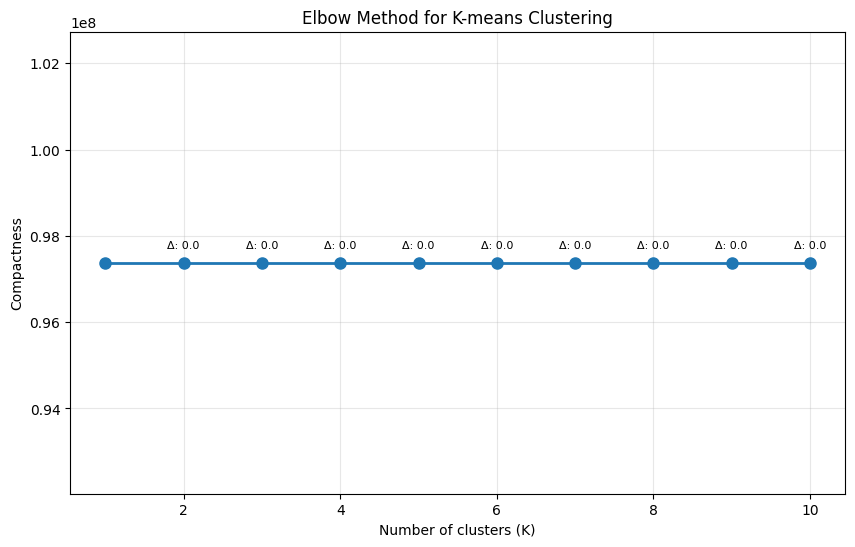

In [32]:

#3c. Elbow method plot showing compactness values for different K values
def plot_elbow_method(image, max_k):
    compactness_values = []
    # compute compactness for each K value
    for K in range(1, max_k + 1):
        compactness, labels, centers = kmeans_segment_image(image, K)
        compactness_values.append(compactness)
        print(f"K={K}: Compactness = {compactness:.2f}")
    
    # plot the compactness values
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), compactness_values, marker='o', linestyle='-', linewidth=2, markersize=8)
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Compactness')
    plt.title('Elbow Method for K-means Clustering')
    plt.grid(True, alpha=0.3)
    
    # Add annotations to help identify the elbow point
    for i, (k, comp) in enumerate(zip(range(1, max_k + 1), compactness_values)):
        if i > 0:
            reduction = compactness_values[i-1] - comp
            plt.annotate(f'Δ: {reduction:.1f}', (k, comp), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    
    plt.show()
    
    return compactness_values

# Generate elbow method plot with max K=10
print("Generating elbow method plot...")
compactness_values = plot_elbow_method(img_rgb, 10)

In [33]:
# Additional analysis to help identify the optimal K
def find_optimal_k(compactness_values):
    # Calculate the percentage reduction in compactness
    reductions = []
    for i in range(1, len(compactness_values)):
        reduction = (compactness_values[i-1] - compactness_values[i]) / compactness_values[i-1] * 100
        reductions.append(reduction)
    
    print("\nCompactness Reduction Analysis:")
    for i, reduction in enumerate(reductions, 2):
        print(f"K={i}: {reduction:.1f}% reduction")
    
    # Find the point where reduction drops significantly (elbow point)
    optimal_k = 2  # default
    for i in range(1, len(reductions)):
        if reductions[i] < reductions[i-1] * 0.6:  # If reduction drops by more than 40%
            optimal_k = i + 1
            break
    
    print(f"\nSuggested optimal K based on elbow method: {optimal_k}")
    return optimal_k

# Find optimal K
optimal_k = find_optimal_k(compactness_values)
print(f"\n3d. Optimal K value based on elbow point: K = {optimal_k}")


Compactness Reduction Analysis:
K=2: 0.0% reduction
K=3: 0.0% reduction
K=4: 0.0% reduction
K=5: 0.0% reduction
K=6: 0.0% reduction
K=7: 0.0% reduction
K=8: 0.0% reduction
K=9: 0.0% reduction
K=10: 0.0% reduction

Suggested optimal K based on elbow method: 2

3d. Optimal K value based on elbow point: K = 2


Optimal K is at K=2. They seem to be all equal, but according to this analysis, 2. 

## Question 4

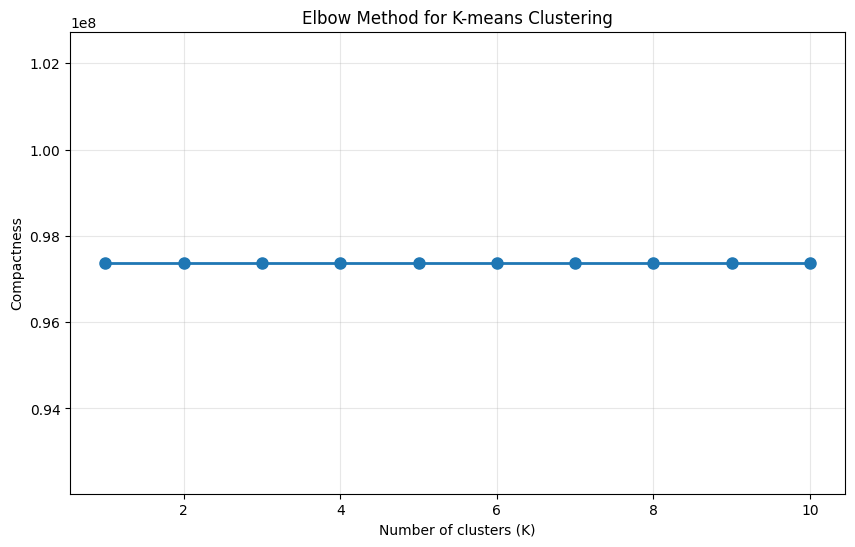

Optimal K value: 1


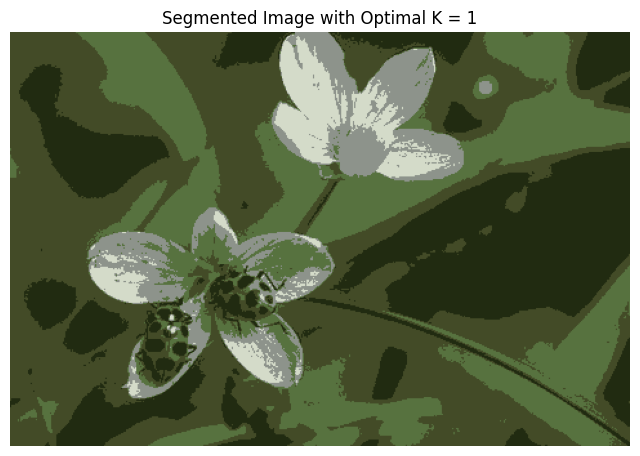

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 4a. Completed function to choose the optimal K value based on compactness values
def choose_optimal_k(compactness_values):
    # Create an X array for the K values
    X = np.arange(1, len(compactness_values) + 1)
    
    # Convert the compactness values to a numpy array
    compactness_values = np.array(compactness_values)
    
    # Find the line connecting the first and last points
    line_start = np.array([X[0], compactness_values[0]])  # The first point
    line_end = np.array([X[-1], compactness_values[-1]])  # The last point
    line_vector = line_end - line_start  # Vector from the first point to the last point
    
    # Get the unit vector of the line
    line_length = np.linalg.norm(line_vector)
    line_unit_vector = line_vector / line_length
    
    # Calculate the distances from each point to the line
    distances = []
    for i in range(len(X)):
        point = np.array([X[i], compactness_values[i]])
        vector_to_point = point - line_start  # Vector from the start of the line to the current point
        
        # Project the vector onto the line
        projection = np.dot(vector_to_point, line_unit_vector) * line_unit_vector
        
        # Calculate the perpendicular distance from the point to the line
        distance = np.linalg.norm(vector_to_point - projection)
        distances.append(distance)
    
    # Find the index of the maximum distance using np.argmax
    optimal_index = np.argmax(distances)
    
    # Return the X value at that index, which is the optimal K value
    optimal_k = X[optimal_index]
    
    return optimal_k

# Modified plot_elbow_method to return compactness_values
def plot_elbow_method(image, max_k):
    compactness_values = []
    # compute compactness for each K value
    for K in range(1, max_k + 1):
        compactness, labels, centers = kmeans_segment_image(image, K)
        compactness_values.append(compactness)
    
    # plot the compactness values
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), compactness_values, marker='o', linestyle='-', linewidth=2, markersize=8)
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Compactness')
    plt.title('Elbow Method for K-means Clustering')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return compactness_values

# Generate the elbow plot and get compactness values
compactness_values = plot_elbow_method(img_rgb, 10)  # This will plot the compactness values for K=1 to K=10

# 4b. Optimal K value printed to the console
optimal_k = choose_optimal_k(compactness_values)  # This will find the optimal K value based on the compactness values
print(f"Optimal K value: {optimal_k}")

# Display the segmented image with the optimal K
compactness, labels, centers = kmeans_segment_image(img_rgb, optimal_k)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_rgb.shape)

plt.figure(figsize=(8, 6))
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'Segmented Image with Optimal K = {optimal_k}')
plt.axis('off')
plt.show()

K=1, Compactness=25446196.76704088
K=2, Compactness=25446196.76704088
K=3, Compactness=25446196.76704088
K=4, Compactness=25446196.76704088
K=5, Compactness=25446196.76704088
K=6, Compactness=25446196.76704088
K=7, Compactness=25446196.76704088
K=8, Compactness=25446196.76704088
K=9, Compactness=25446196.76704088
K=10, Compactness=25446196.76704088
All compactness values: [25446196.76704088, 25446196.76704088, 25446196.76704088, 25446196.76704088, 25446196.76704088, 25446196.76704088, 25446196.76704088, 25446196.76704088, 25446196.76704088, 25446196.76704088]


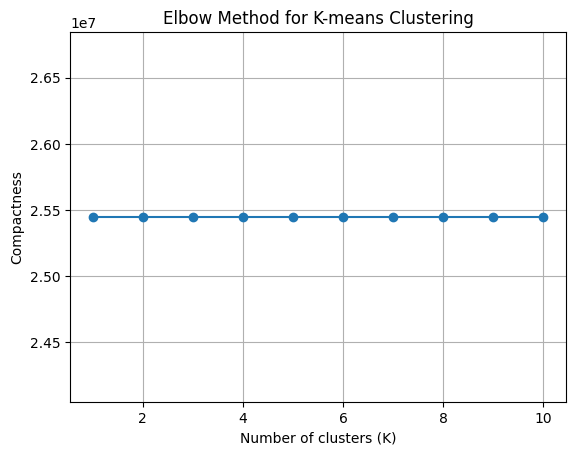

NameError: name 'choose_optimal_k' is not defined

In [28]:
compactness_values = plot_elbow_method(img_rgb, 10) # This will plot the compactness values for K=1 to K=10

optimal_k = choose_optimal_k(compactness_values) # This will find the optimal K value based on the compactness values
print(f"Optimal K value: {optimal_k}")

Generating elbow method plot...


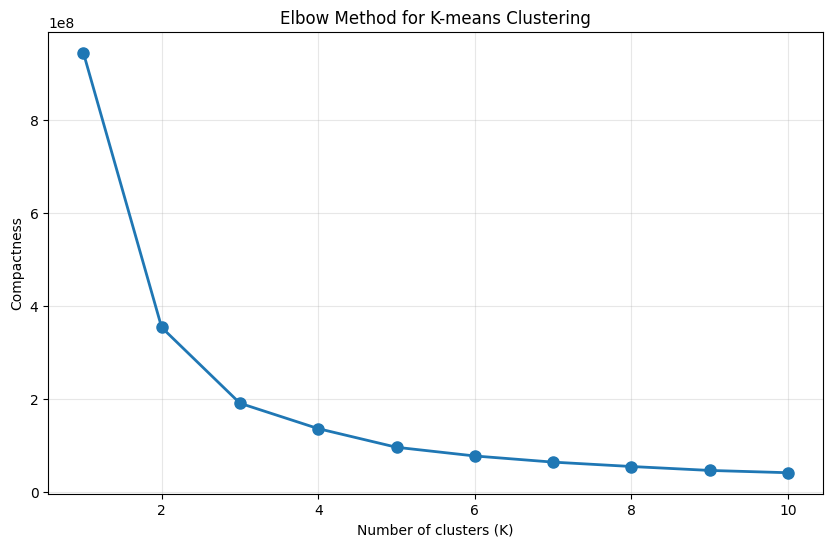

Calculating optimal K value...
Optimal K value: 3
Displaying segmented image with optimal K = 3


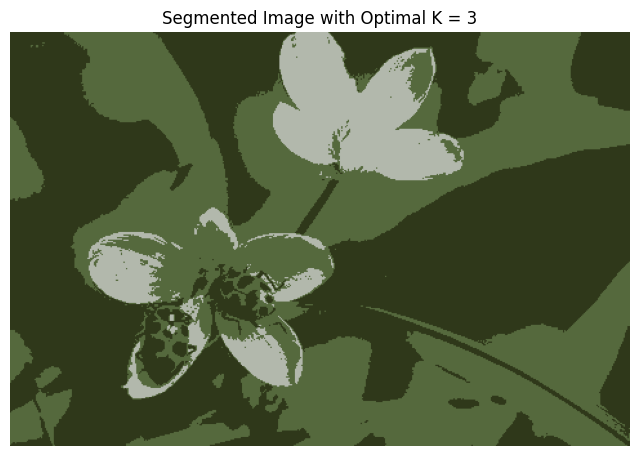

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# First, define the kmeans_segment_image function
def kmeans_segment_image(image, K):
    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    # Define K-means parameters
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    attempts = 10
    flags = cv2.KMEANS_RANDOM_CENTERS
    
    # Run K-means algorithm
    compactness, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, attempts, flags)
    
    return compactness, labels, centers

# Next, define the choose_optimal_k function
def choose_optimal_k(compactness_values):
    # Create an X array for the K values
    X = np.arange(1, len(compactness_values) + 1)
    
    # Convert the compactness values to a numpy array
    compactness_values = np.array(compactness_values)
    
    # Find the line connecting the first and last points
    line_start = np.array([X[0], compactness_values[0]])  # The first point
    line_end = np.array([X[-1], compactness_values[-1]])  # The last point
    line_vector = line_end - line_start  # Vector from the first point to the last point
    
    # Get the unit vector of the line
    line_length = np.linalg.norm(line_vector)
    line_unit_vector = line_vector / line_length
    
    # Calculate the distances from each point to the line
    distances = []
    for i in range(len(X)):
        point = np.array([X[i], compactness_values[i]])
        vector_to_point = point - line_start  # Vector from the start of the line to the current point
        
        # Project the vector onto the line
        projection = np.dot(vector_to_point, line_unit_vector) * line_unit_vector
        
        # Calculate the perpendicular distance from the point to the line
        distance = np.linalg.norm(vector_to_point - projection)
        distances.append(distance)
    
    # Find the index of the maximum distance using np.argmax
    optimal_index = np.argmax(distances)
    
    # Return the X value at that index, which is the optimal K value
    optimal_k = X[optimal_index]
    
    return optimal_k

# Then, define the plot_elbow_method function
def plot_elbow_method(image, max_k):
    compactness_values = []
    # compute compactness for each K value
    for K in range(1, max_k + 1):
        compactness, labels, centers = kmeans_segment_image(image, K)
        compactness_values.append(compactness)
    
    # plot the compactness values
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), compactness_values, marker='o', linestyle='-', linewidth=2, markersize=8)
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Compactness')
    plt.title('Elbow Method for K-means Clustering')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return compactness_values

# Now run the main code
print("Generating elbow method plot...")
compactness_values = plot_elbow_method(img_rgb, 10)  # This will plot the compactness values for K=1 to K=10

print("Calculating optimal K value...")
optimal_k = choose_optimal_k(compactness_values)  # This will find the optimal K value based on the compactness values

# 4b. Optimal K value printed to the console
print(f"Optimal K value: {optimal_k}")

# Display the segmented image with the optimal K
print(f"Displaying segmented image with optimal K = {optimal_k}")
compactness, labels, centers = kmeans_segment_image(img_rgb, optimal_k)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_rgb.shape)

plt.figure(figsize=(8, 6))
plt.imshow(segmented_image.astype(np.uint8))
plt.title(f'Segmented Image with Optimal K = {optimal_k}')
plt.axis('off')
plt.show()

In [49]:
def variance_ratio_method(image, max_k):
    ratios = []
    for k in range(1, max_k):
        compactness_k, _, _ = kmeans_segment_image(image, k)
        compactness_k1, _, _ = kmeans_segment_image(image, k + 1)
        ratio = compactness_k / compactness_k1 if compactness_k1 > 0 else 0
        ratios.append(ratio)
    
    optimal_k = np.argmax(ratios) + 1
    return optimal_k

A variance ratio method looks for points where the variance reduction slows down. This could be a different way to find optimal K.

## Question 5

In [29]:
def kmeans_segment_image_spatial(image, K, compactness_scaler=1.0):

    # STEP 1: Get the height and width of the image using the shape attribute
    height, width, _ = image.shape

    # STEP 2: Preprocess the image, reshaping it and converting it to float32
    pixels = # YOUR CODE HERE

    # STEP 3: Create a grid of x and y coordinates for each pixel using numpy's meshgrid function, and then convert it to a 2D array
    # There are a lot of numpy functions being used here, so here's a brief summary of what they do:
    # np.arange creates a 1D array of evenly spaced values for a given range, similar to the range() function in Python
    # np.meshgrid creates a grid of coordinates from two 1D arrays. In this case, we pass the arange of width and height to create a grid of x and y coordinates for each pixel in the image.
    # np.stack combines multiple arrays on a new axis. In this case, we stack up the x and y coordinates to create a 2D array where each row is a pixel's coordinates
    # ravel flattens the 2D array from meshgrid into a 1D array, which is then reshaped into a 2D array with two columns (x and y coordinates)
    # Overall, this allows us to create a 2D array of coordinates for each pixel in the image, in a good structure that we can use to concatenate with the RGB values later on.
    x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))
    coords = np.stack([x_coords.ravel(), y_coords.ravel()], axis=1).astype(np.float32)

    # STEP 4: Normalize the spatial information to 0-1 so that width and height are not different scales
    # Divide all of the coordinates by the maximum between width and height. This will ensure that the coordinates are in the range [0, 1].

    # STEP 5: Scale the information to the same scale as the RGB values (0-255) by multiplying by 255. Then, further scale the compactness by a factor of compactness_scaler, which determines how much influence the spatial information has on the clustering.

    # STEP 6: Concatenate the RGB values and the coordinates along the last axis to create a 5D feature vector
    image_reformatted = np.concatenate((pixels, coords), axis=-1)

    # STEP 7: Define the K-means parameters (criteria, bestLabels, attempts, flags)

    # STEP 8: Run the K-means algorithm using cv2.kmeans

    # STEP 9: Return the compactness, labels, and centers

    return compactness, labels, centers

SyntaxError: invalid syntax (2704002844.py, line 7)

In [30]:
compactness, labels, centers = kmeans_segment_image(img_rgb, 5)
segmented_image1 = centers[labels.flatten()]
segmented_image1 = segmented_image.reshape(img_rgb.shape)
segmented_image1 = segmented_image1.astype(np.uint8)

compactness_spatial, labels_spatial, centers_spatial = kmeans_segment_image_spatial(img_rgb, 5)
segmented_image2 = centers_spatial[labels_spatial.flatten(), :3]  # Only take the RGB values from the centers
segmented_image2 = segmented_image2.reshape(img_rgb.shape)
segmented_image2 = segmented_image2.astype(np.uint8)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(segmented_image1)
plt.title('K-means Segmentation (Color Only)')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image2)
plt.title('K-means Segmentation (Color + Spatial)')
plt.show()

NameError: name 'kmeans_segment_image_spatial' is not defined

Comparing color-only vs spatial segmentation...


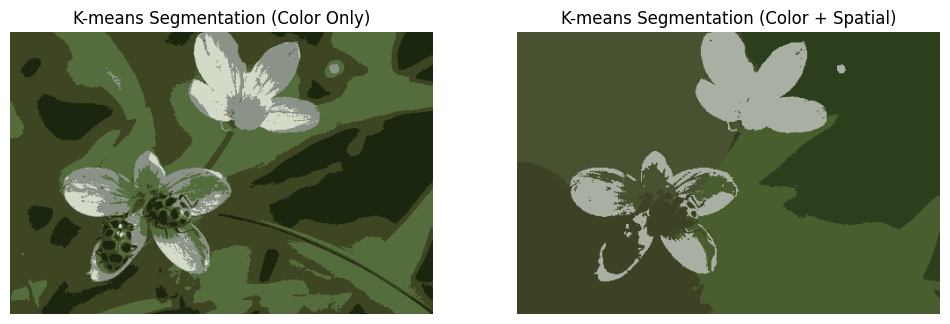

Color-only compactness: 95374044.68
Spatial compactness: 638047591.93


In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 5a. Implemented kmeans_segment_image_spatial function that includes spatial coordinates in the feature vector
def kmeans_segment_image_spatial(image, K, compactness_scaler=1.0):
    # STEP 1: Get the height and width of the image using the shape attribute
    height, width, _ = image.shape
    
    # STEP 2: Preprocess the image, reshaping it and converting it to float32
    pixels = image.reshape((-1, 3)).astype(np.float32)
    
    # STEP 3: Create a grid of x and y coordinates for each pixel using numpy's meshgrid function
    x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))
    coords = np.stack([x_coords.ravel(), y_coords.ravel()], axis=1).astype(np.float32)
    
    # STEP 4: Normalize the spatial information to 0-1 so that width and height are not different scales
    max_dim = max(width, height)
    coords = coords / max_dim
    
    # STEP 5: Scale the information to the same scale as the RGB values (0-255) by multiplying by 255
    # Then, further scale by the compactness_scaler parameter
    coords = coords * 255 * compactness_scaler
    
    # STEP 6: Concatenate the RGB values and the coordinates along the last axis to create a 5D feature vector
    image_reformatted = np.concatenate((pixels, coords), axis=-1)
    
    # STEP 7: Define the K-means parameters (criteria, bestLabels, attempts, flags)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    attempts = 10
    flags = cv2.KMEANS_RANDOM_CENTERS
    
    # STEP 8: Run the K-means algorithm using cv2.kmeans
    compactness, labels, centers = cv2.kmeans(image_reformatted, K, None, criteria, attempts, flags)
    
    # STEP 9: Return the compactness, Labels, and centers
    return compactness, labels, centers

# Test the comparison between color-only and spatial segmentation
# 5b. Segmented image displayed using matplotlib that includes spatial information
print("Comparing color-only vs spatial segmentation...")

# Fix the typos in the provided test code
compactness, labels, centers = kmeans_segment_image(img_rgb, 5)
segmented_image1 = centers[labels.flatten()]
segmented_image1 = segmented_image1.reshape(img_rgb.shape)
segmented_image1 = segmented_image1.astype(np.uint8)

compactness_spatial, labels_spatial, centers_spatial = kmeans_segment_image_spatial(img_rgb, 5)
segmented_image2 = centers_spatial[labels_spatial.flatten(), :3]  # Only take the RGB values from the centers
segmented_image2 = segmented_image2.reshape(img_rgb.shape)
segmented_image2 = segmented_image2.astype(np.uint8)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(segmented_image1)
plt.title('K-means Segmentation (Color Only)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image2)
plt.title('K-means Segmentation (Color + Spatial)')
plt.axis('off')
plt.show()

print(f"Color-only compactness: {compactness:.2f}")
print(f"Spatial compactness: {compactness_spatial:.2f}")

Experimenting with different K values and compactness scalers...


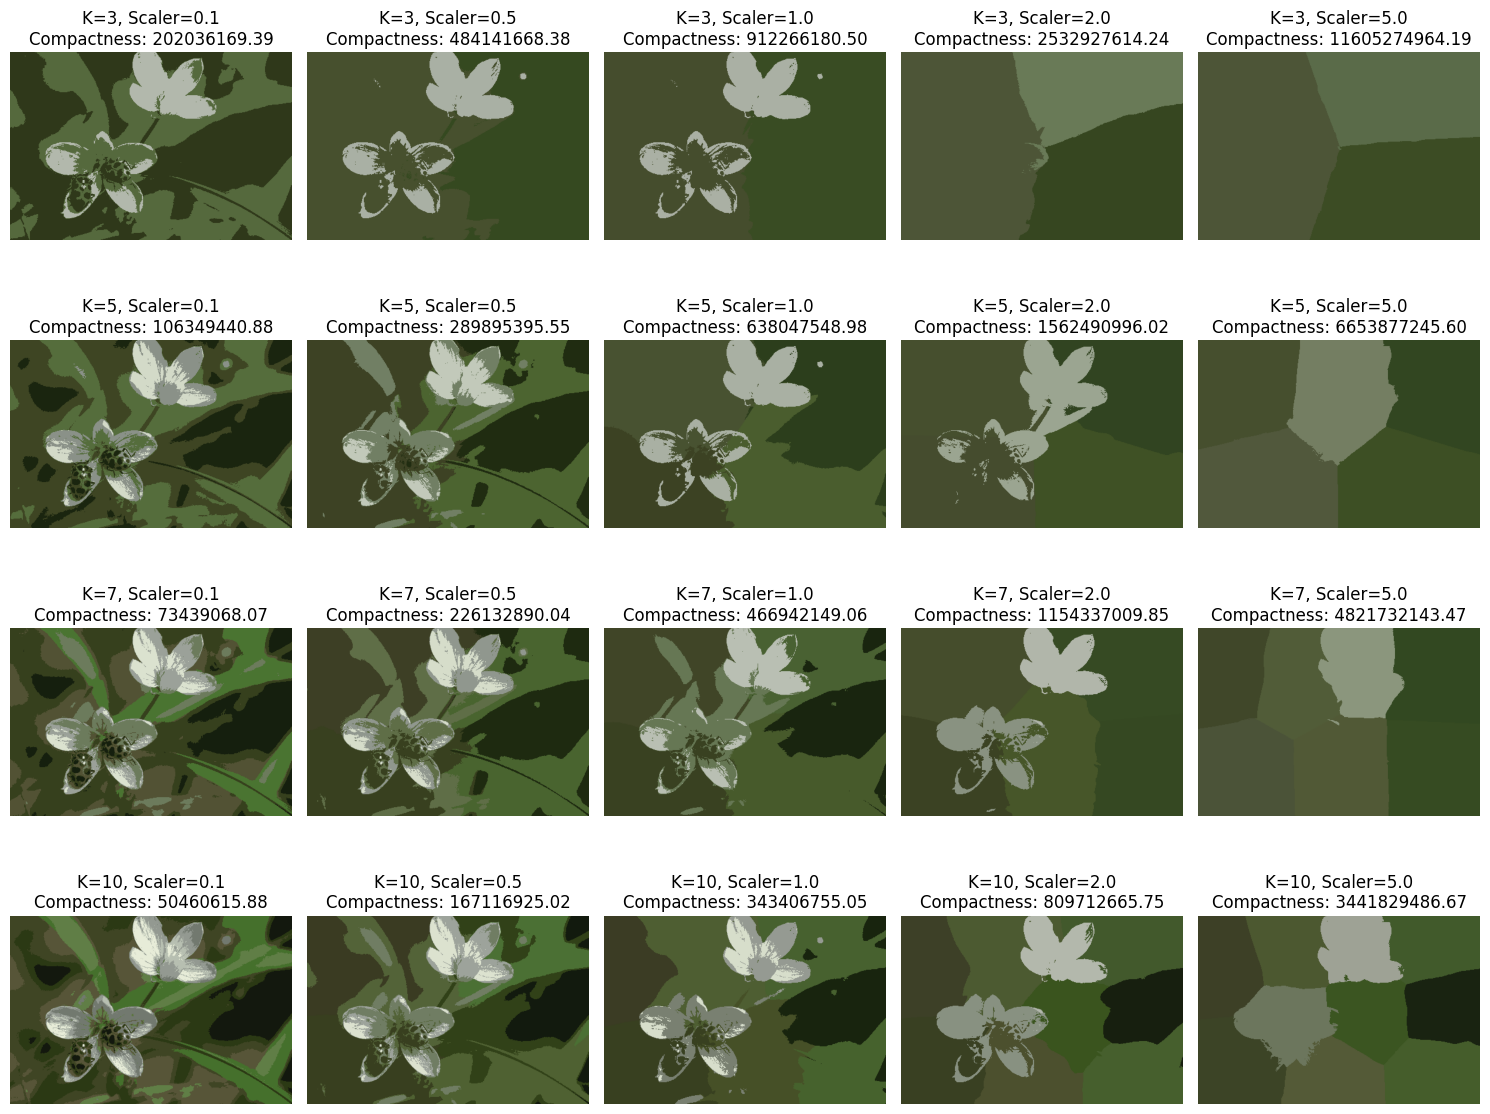

In [51]:
# 5c. Experiment with different values of K and `compactness_scaler`, and display the results
def experiment_with_parameters(image, k_values, scaler_values):
    fig, axes = plt.subplots(len(k_values), len(scaler_values), figsize=(15, 12))
    
    for i, K in enumerate(k_values):
        for j, scaler in enumerate(scaler_values):
            if K == 1:
                # Skip K=1 as it's not very informative
                axes[i, j].imshow(np.zeros_like(image))
                axes[i, j].set_title(f'K={K}, Scaler={scaler}\n(Skipped)')
                axes[i, j].axis('off')
                continue
                
            compactness, labels, centers = kmeans_segment_image_spatial(image, K, scaler)
            segmented = centers[labels.flatten(), :3].reshape(image.shape).astype(np.uint8)
            
            axes[i, j].imshow(segmented)
            axes[i, j].set_title(f'K={K}, Scaler={scaler}\nCompactness: {compactness:.2f}')
            axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Test with different K values and scalers
k_values = [3, 5, 7, 10]
scaler_values = [0.1, 0.5, 1.0, 2.0, 5.0]

print("Experimenting with different K values and compactness scalers...")
experiment_with_parameters(img_rgb, k_values, scaler_values)

Testing with very high compactness_scaler values...


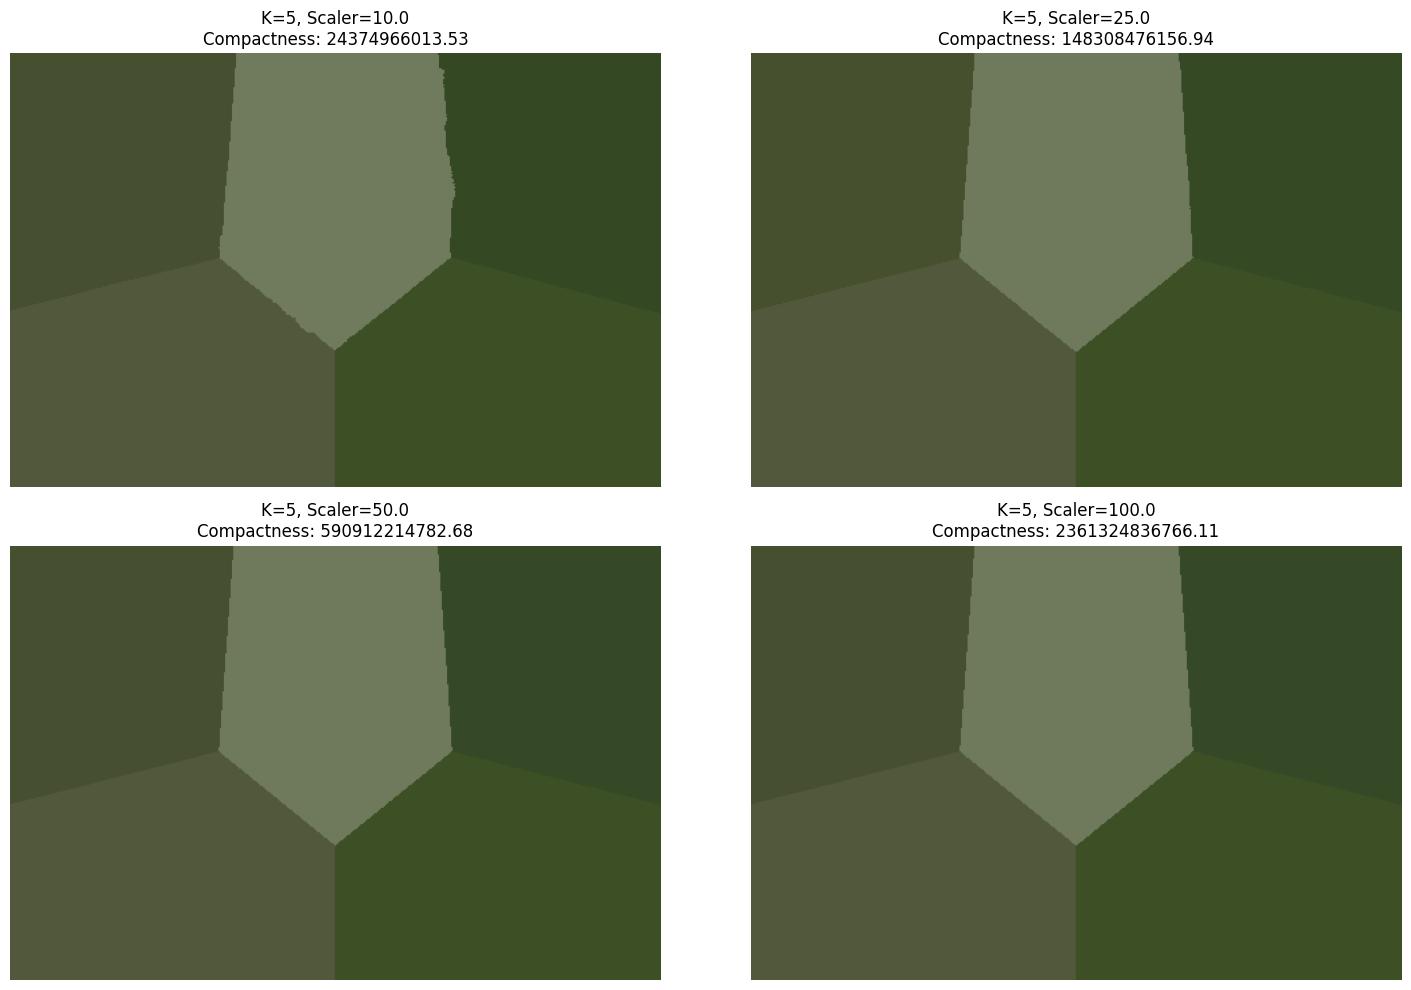

In [52]:
# Test with very high compactness_scaler values
def test_high_scalers(image, K=5):
    high_scalers = [10.0, 25.0, 50.0, 100.0]
    
    plt.figure(figsize=(15, 10))
    
    for i, scaler in enumerate(high_scalers):
        compactness, labels, centers = kmeans_segment_image_spatial(image, K, scaler)
        segmented = centers[labels.flatten(), :3].reshape(image.shape).astype(np.uint8)
        
        plt.subplot(2, 2, i+1)
        plt.imshow(segmented)
        plt.title(f'K={K}, Scaler={scaler}\nCompactness: {compactness:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print("Testing with very high compactness_scaler values...")
test_high_scalers(img_rgb, K=5)

When you increase the compactness_scaler the image gets split into geometric regions, color info is irrelevant or ignored, there are boundaries.
I think this happens because 
with high compactness_scaler, spatial coordinates get scaled to 255 × scaler

At scaler=100, spatial coordinates range 0-25,500 while colors range 0-255

This 100:1 ratio makes spatial information 100× more influential

Distance Metric Bias:

K-means uses Euclidean distance in the 5D feature space

With high spatial scaling, the distance between pixels is dominated by their coordinate differences

Two pixels with identical colors but different locations will be far apart in this scaled space

Mathematical Explanation:

text
Distance = √[(R₁-R₂)² + (G₁-G₂)² + (B₁-B₂)² + (scaler×Δx)² + (scaler×Δy)²]
When scaler is large, the spatial terms dominate the distance calculation.

Practical Implications:

Low scaler (0.1-0.5): Good for color-based segmentation with slight spatial regularization

Medium scaler (0.5-2.0): Balanced approach for most applications

High scaler (5.0+): Useful when you want to enforce spatial compactness regardless of color

Very high scaler (50.0+): Essentially performs spatial partitioning ignoring color

This behavior demonstrates the importance of feature scaling in machine learning and how different feature dimensions can dominate the clustering process when not properly normalized.




## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

In [ ]:
Colleen